#**Gas Turbines Problem**

In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
dataset=pd.read_csv('gas_turbines.csv')

In [ ]:
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
dataset.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
dataset.shape

(15039, 11)

In [ ]:
dataset.insert(11,'TEY_cat','')
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,TEY_cat
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,


In [ ]:
for i in range (0,len(dataset['TEY'])):
  if dataset['TEY'][i]<=130:
    dataset['TEY_cat'][i]='Bad'
  else:
    dataset['TEY_cat'][i]='Good'

In [ ]:
label_encoder=preprocessing.LabelEncoder()
dataset['TEY_cat']=label_encoder.fit_transform(dataset['TEY_cat'])

In [ ]:
dataset=dataset.drop('TEY',axis=1)

In [ ]:
dataset.shape

(15039, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AT       15039 non-null  float64
 1   AP       15039 non-null  float64
 2   AH       15039 non-null  float64
 3   AFDP     15039 non-null  float64
 4   GTEP     15039 non-null  float64
 5   TIT      15039 non-null  float64
 6   TAT      15039 non-null  float64
 7   CDP      15039 non-null  float64
 8   CO       15039 non-null  float64
 9   NOX      15039 non-null  float64
 10  TEY_cat  15039 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

AT         0
AP         0
AH         0
AFDP       0
GTEP       0
TIT        0
TAT        0
CDP        0
CO         0
NOX        0
TEY_cat    0
dtype: int64

<AxesSubplot:>

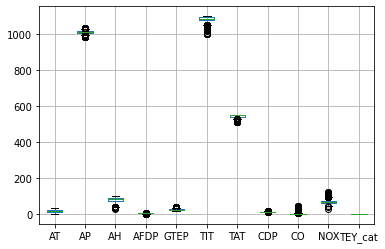

In [ ]:
dataset.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d45343100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d45375b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d453753d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d45365100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d453653d0>],
 'means': []}

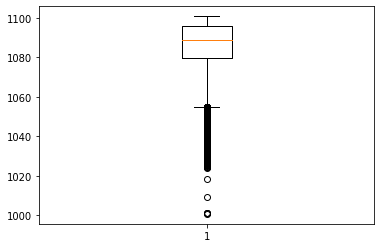

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['TIT'])

In [ ]:
dataset=dataset.drop(dataset[dataset['TIT']<1070].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d4fb2b580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d4fb2bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d4fb2b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d4fb212b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d4fb21580>],
 'means': []}

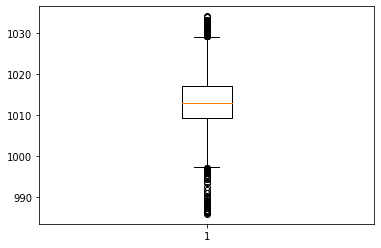

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['AP'])

In [ ]:
dataset=dataset.drop(dataset[dataset['AP']>1025].index,axis=0)
dataset=dataset.drop(dataset[dataset['AP']<1000].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d4facf970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d4fc8f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d4fa85e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d4fc8f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d4fc8f6d0>],
 'means': []}

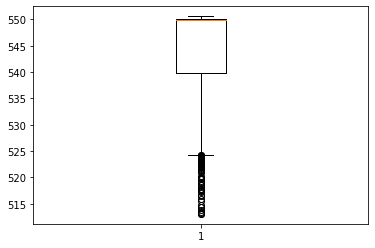

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['TAT'])

In [ ]:
dataset=dataset.drop(dataset[dataset['TAT']<530].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d55524a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d553c2460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d55524b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d5556f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d5556fb50>],
 'means': []}

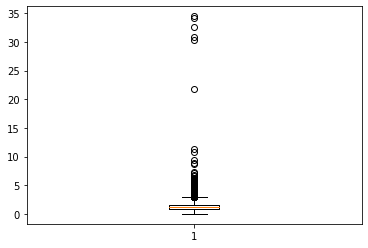

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['CO'])

In [ ]:
dataset=dataset.drop(dataset[dataset['CO']>3].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d4fbdd520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d4fbdddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d4fbdd2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d55575550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d555759a0>],
 'means': []}

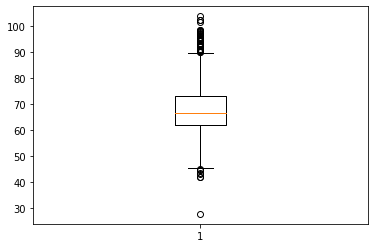

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['NOX'])

In [ ]:
dataset=dataset.drop(dataset[dataset['NOX']>85].index,axis=0)
dataset=dataset.drop(dataset[dataset['NOX']<50].index,axis=0)

In [ ]:
dataset.shape

(9502, 11)

In [ ]:
X=dataset[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
Y=dataset['TEY_cat']

In [ ]:
a=StandardScaler()
a.fit(X)
x_standardized=a.transform(X)

In [ ]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03,9.502000e+03
mean,-2.392903e-17,1.573334e-14,5.952347e-16,-8.375162e-17,-8.554629e-16,-2.371965e-14,1.091762e-15,1.058860e-15,-2.033968e-16,-5.264387e-16
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-2.474013e+00,-2.428400e+00,-3.254390e+00,-2.779632e+00,-1.882871e+00,-3.343773e+00,-2.675706e+00,-1.957804e+00,-2.114867e+00,-2.311044e+00
25%,-8.152473e-01,-7.085767e-01,-7.374100e-01,-5.498621e-01,-7.397015e-01,-7.402212e-01,-1.960403e-01,-6.690602e-01,-7.480759e-01,-7.506118e-01
50%,1.070286e-01,-3.224168e-02,1.776826e-01,-2.585404e-02,-3.059705e-01,-4.594073e-02,5.401105e-01,-3.616534e-01,-9.969417e-04,-1.236208e-01
75%,8.235210e-01,6.827411e-01,8.242782e-01,3.849354e-01,3.523977e-01,8.219098e-01,5.675547e-01,3.680682e-01,6.597701e-01,6.892313e-01
max,2.101247e+00,2.402564e+00,1.576862e+00,5.312236e+00,2.519573e+00,1.484632e+00,6.515018e-01,2.465602e+00,3.137285e+00,2.346815e+00


Tuning of Batch Size and Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Dropout

In [ ]:
def create_model():
  model=Sequential(name='Hyperparameter-Tuning-Dummy')
  model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(learning_rate=0.01)
  model.compile(loss='MeanSquaredError',optimizer=adam,metrics=['accuracy'])
  return model

In [ ]:
model=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.004 total time=  24.3s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.001 total time=  21.9s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.002 total time=  20.3s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.002 total time=  21.1s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.002 total time=  22.1s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ...batch_size=10, epochs=50;,

In [ ]:
print('Best:{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.0023694731295108794, using {'batch_size': 10, 'epochs': 10}
-0.0023694731295108794,0.0008200301093450615 with: {'batch_size': 10, 'epochs': 10}
-0.002797008492052555,0.0011064601641290286 with: {'batch_size': 10, 'epochs': 50}
-0.0038888127077370883,0.0016769165164786303 with: {'batch_size': 10, 'epochs': 100}
-0.004646577825769782,0.0014464880394619805 with: {'batch_size': 10, 'epochs': 150}
-0.0029378199717029927,0.0010235865849466206 with: {'batch_size': 20, 'epochs': 10}
-0.0033960266038775442,0.0013286893561492428 with: {'batch_size': 20, 'epochs': 50}
-0.0035029479768127203,0.0010894742646191816 with: {'batch_size': 20, 'epochs': 100}
-0.0029468566412106157,0.0007619263851616521 with: {'batch_size': 20, 'epochs': 150}
-0.002730635553598404,0.0007486609922817145 with: {'batch_size': 40, 'epochs': 10}
-0.002565698022954166,0.0007195589273998062 with: {'batch_size': 40, 'epochs': 50}
-0.0039789008907973765,0.001809134403659234 with: {'batch_size': 40, 'epochs': 100}
-0.00330

Tuning of Learning Rate and Dropout

In [ ]:
from keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=10,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(12,input_dim=8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='MeanSquaredError',optimizer=adam,metrics=['accuracy'])
  return model

model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=50)

learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.004 total time=  26.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time=  27.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.003 total time=  43.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.002 total time=  42.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.003 total time=  30.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [ ]:
print('Best:{}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.0023759388830512764, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.002639952558092773,0.0008311796380694781 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.0029227941296994684,0.0005986007366758442 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.06822947841137647,0.10922861325708423 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.0023759388830512764,0.0007614210587815103 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.002900585765019059,0.0012376630651610263 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.014298191573470832,0.015855151955868733 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.0024731527315452694,0.0009805868883614119 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.0028226808412000538,0.0014728905335602061 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.008921349328011275,0.0026133527311079058 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Activation Function and Kernel Initializer

In [ ]:
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(12,input_dim=8,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(lr=0.001)
  model.compile(loss='MeanSquaredError',optimizer=adam,metrics=['accuracy'])
  return model

model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=50)

activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']

param_grids=dict(activation_function=activation_function,init=init)

grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.005 total time=  39.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.001 total time=  42.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.002 total time=  42.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.002 total time=  43.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.004 total time=  42.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=-0.004 total time=  43.0s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=-0.001 total time=  34.7s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=-0.002 total time=  42.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=-0.002 total time=  33.6s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=-0.004 total time=  34.3s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=-0.005 total time=  43.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=-0.001 total time=  44.1s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=-0.002 total time=  35.1s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=-0.002 total time=  35.0s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=-0.003 total time=  32.4s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=-0.003 total time=  42.6s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=-0.001 total time=  31.5s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=-0.002 total time=  33.0s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=-0.002 total time=  33.5s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=-0.004 total time=  42.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=-0.004 total time=  42.7s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................
[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=-0.001 total time=  42.4s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=-0.002 total time=  35.9s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=-0.002 total time=  42.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=-0.003 total time=  42.9s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=-0.206 total time=  42.7s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=-0.185 total time=  37.1s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=-0.154 total time=  37.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=-0.187 total time=  42.8s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=-0.241 total time=  33.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.004 total time=  42.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.001 total time=  42.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.002 total time=  42.5s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.002 total time=  29.6s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.004 total time=  42.4s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=-0.003 total time=  42.4s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=-0.001 total time=  42.5s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=-0.002 total time=  27.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=-0.002 total time=  42.5s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=-0.002 total time=  42.8s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=-0.207 total time=  30.0s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=-0.185 total time=  43.2s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=-0.154 total time=  42.7s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=-0.187 total time=  42.6s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=-0.241 total time=  43.7s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=-0.003 total time=  42.5s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=-0.001 total time=  42.4s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=-0.002 total time=  42.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=-0.002 total time=  42.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=-0.004 total time=  42.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=-0.003 total time=  29.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=-0.001 total time=  26.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=-0.002 total time=  26.9s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=-0.002 total time=  42.6s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=-0.003 total time=  42.4s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=-0.206 total time=  27.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=-0.185 total time=  26.0s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=-0.155 total time=  42.4s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=-0.187 total time=  26.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=-0.242 total time=  42.3s


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0020281079225242136, using {'activation_function': 'tanh', 'init': 'normal'}
-0.0027522357646375894,0.0011971789856194041 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.002822911296971142,0.0013087003976771272 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.0027524443343281747,0.0011229394239999021 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.0024625392397865653,0.0008736662429263964 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.0024584542727097867,0.0008257852996077891 with: {'activation_function': 'relu', 'init': 'normal'}
-0.19487920105457307,0.028595072548132226 with: {'activation_function': 'relu', 'init': 'zero'}
-0.002414810634218156,0.0011306198298325597 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.0020281079225242136,0.000669816796120107 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.19484903216361998,0.02845096909856452 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.00230

Tuning of Number of Neurons in Activation layer

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'MeanSquaredError',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

neuron1 = [4,8,16]
neuron2 = [2,4,8]

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.004 total time=  42.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.001 total time=  27.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.002 total time=  42.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.002 total time=  31.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.004 total time=  27.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.004 total time=  29.4s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.001 total time=  28.3s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.002 total time=  27.3s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.002 total time=  42.8s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.005 total time=  42.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.003 total time=  42.6s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.001 total time=  42.5s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.002 total time=  42.5s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.002 total time=  42.4s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.004 total time=  26.8s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.003 total time=  42.7s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 2/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.001 total time=  42.4s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.002 total time=  29.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.002 total time=  27.0s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.003 total time=  26.9s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.003 total time=  42.4s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.001 total time=  28.9s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.002 total time=  28.4s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.002 total time=  42.5s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.003 total time=  26.6s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.003 total time=  42.8s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.001 total time=  27.1s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.002 total time=  42.7s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.002 total time=  28.9s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.002 total time=  27.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.003 total time=  27.2s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.001 total time=  27.3s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.002 total time=  42.5s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.002 total time=  42.5s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.002 total time=  27.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.004 total time=  42.7s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.001 total time=  28.1s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.002 total time=  28.0s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.002 total time=  42.5s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.003 total time=  31.8s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.003 total time=  42.5s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.001 total time=  42.4s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.002 total time=  42.5s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.002 total time=  27.6s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.005 total time=  42.4s


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0021054266020655633, using {'neuron1': 16, 'neuron2': 2}
-0.002418175293132663,0.0010495695135206687 with: {'neuron1': 4, 'neuron2': 2}
-0.002628853265196085,0.0013389380003223485 with: {'neuron1': 4, 'neuron2': 4}
-0.002364388294517994,0.0009536611931855577 with: {'neuron1': 4, 'neuron2': 8}
-0.0022391595412045717,0.0008229889224007695 with: {'neuron1': 8, 'neuron2': 2}
-0.002334530814550817,0.00091493396996754 with: {'neuron1': 8, 'neuron2': 4}
-0.0021701060351915656,0.0008226666027074497 with: {'neuron1': 8, 'neuron2': 8}
-0.0021054266020655633,0.0006899828759652251 with: {'neuron1': 16, 'neuron2': 2}
-0.0023035169346258045,0.0010099943636907313 with: {'neuron1': 16, 'neuron2': 4}
-0.002396009978838265,0.001304532886349101 with: {'neuron1': 16, 'neuron2': 8}


Training model with values of Hyperparameters

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128,input_dim = 10,activation = 'relu'))
  model.add(Dense(64,input_dim = 10,activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(Dense(16,activation = 'linear'))
  model.add(Dropout(0.1))
  model.add(Dense(1))
  model.compile(loss = 'MeanSquaredError',optimizer = 'adam',metrics = ['mse'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

model.fit(x_standardized,Y)

y_predict = model.predict(x_standardized)

print(accuracy_score(Y,y_predict))

297/297 [==============================] - 0s 1ms/step
0.9960008419280152


In [ ]:
model.fit(x_standardized,Y,epochs=20)

#**Forest Fires Problem**

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from  google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
frst=pd.read_csv('forestfires.csv')
frst.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
frst.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
frst=frst.drop(['month','day','area'],axis=1)
frst.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'dayfri',
       'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr',
       'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun',
       'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [6]:
label_encoder=preprocessing.LabelEncoder()
frst['size_category']=label_encoder.fit_transform(frst['size_category'])

In [7]:
frst.shape

(517, 28)

In [8]:
X=frst[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep']]
Y=frst['size_category']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      517 non-null    float64
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   ISI       517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    int64  
 6   wind      517 non-null    float64
 7   rain      517 non-null    float64
 8   dayfri    517 non-null    int64  
 9   daymon    517 non-null    int64  
 10  daysat    517 non-null    int64  
 11  daysun    517 non-null    int64  
 12  daythu    517 non-null    int64  
 13  daytue    517 non-null    int64  
 14  daywed    517 non-null    int64  
 15  monthapr  517 non-null    int64  
 16  monthaug  517 non-null    int64  
 17  monthdec  517 non-null    int64  
 18  monthfeb  517 non-null    int64  
 19  monthjan  517 non-null    int64  
 20  monthjul  517 non-null    int64 

<AxesSubplot:>

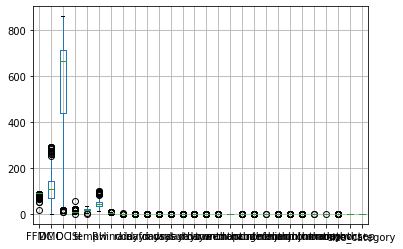

In [10]:
frst.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43e74323a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43e7432940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43e74320d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43e7432ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43e743d1f0>],
 'means': []}

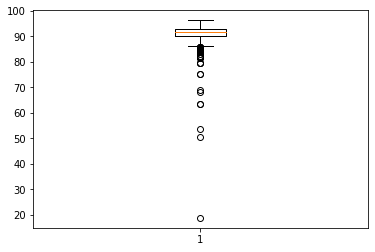

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(frst['FFMC'])

In [12]:
frst=frst.drop(frst[frst['FFMC']<88].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43e7413d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43e7421340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43e7413a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43e74218e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43e7421bb0>],
 'means': []}

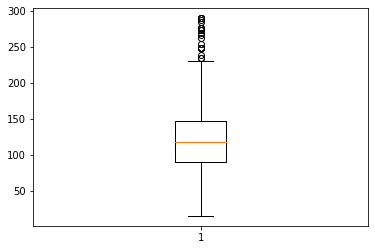

In [13]:
plt.boxplot(frst['DMC'])

In [14]:
frst=frst.drop(frst[frst['DMC']>250].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43e7378670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43e7378c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43e73783a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43e7384220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43e73844f0>],
 'means': []}

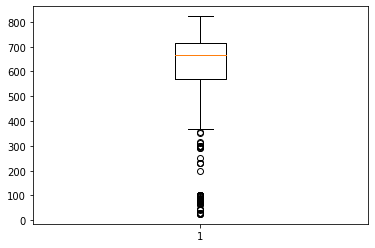

In [15]:
plt.boxplot(frst['DC'])

In [16]:
frst=frst.drop(frst[frst['DC']<500].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43e73645b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43e7364b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43e73642e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43e72f0130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43e72f0400>],
 'means': []}

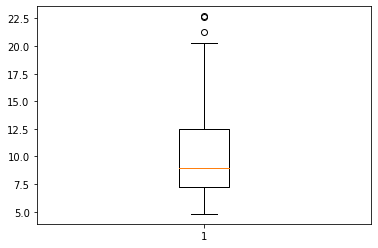

In [17]:
plt.boxplot(frst['ISI'])

In [18]:
frst=frst.drop(frst[frst['ISI']>20].index,axis=0)

In [19]:
frst.shape

(330, 28)

In [20]:
a=StandardScaler()
a.fit(X)
x_standardized=a.transform(X)

In [21]:
x_standardized

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [22]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,3.435893e-18,-5.497429e-17,...,-6.871787e-17,2.061536e-17,2.233331e-17,-1.374357e-17,-1.374357e-17,-8.246144e-17,-1.717947e-17,-1.030768e-17,5.497429e-17,2.748715e-17
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,2.254407e+00,2.446730e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


model 1

In [46]:
def create_model1():
  model1 = Sequential()
  model1.add(Dense(128,input_dim = 27,activation = 'linear'))
  model1.add(Dense(64,activation = 'linear'))
  model1.add(Dropout(0.1))
  model1.add(Dense(16,activation = 'linear'))
  model1.add(Dropout(0.1))
  model1.add(Dense(1))
  model1.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model1

In [47]:
model1 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 40,epochs = 10)

model1.fit(x_standardized,Y)

y_predict1 = model1.predict(x_standardized)

print(accuracy_score(Y,y_predict1))

17/17 [==============================] - 0s 3ms/step
0.6421663442940039


In [48]:
a=accuracy_score(Y,y_predict1)
a

0.6421663442940039

model 2

In [49]:
def create_model2():
  model2 = Sequential()
  model2.add(Dense(64,input_dim = 27,activation = 'linear'))
  model2.add(Dense(32,activation = 'linear'))
  model2.add(Dropout(0.1))
  model2.add(Dense(8,activation = 'linear'))
  model2.add(Dropout(0.1))
  model2.add(Dense(1))
  model2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model2

In [50]:
model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 40,epochs = 10)

model2.fit(x_standardized,Y)

y_predict2 = model2.predict(x_standardized)

print(accuracy_score(Y,y_predict2))

17/17 [==============================] - 0s 2ms/step
0.5725338491295938


In [51]:
b=accuracy_score(Y,y_predict2)
b

0.5725338491295938

model 3

In [52]:
def create_model3():
  model3 = Sequential()
  model3.add(Dense(64,input_dim = 27,activation = 'linear'))
  model3.add(Dense(32,activation = 'linear'))
  model3.add(Dropout(0.01))
  model3.add(Dense(8,activation = 'linear'))
  model3.add(Dropout(0.01))
  model3.add(Dense(1))
  model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model3

In [53]:
model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 40,epochs = 10)

model3.fit(x_standardized,Y)

y_predict3 = model3.predict(x_standardized)

print(accuracy_score(Y,y_predict3))

17/17 [==============================] - 0s 2ms/step
0.5725338491295938


In [54]:
c=accuracy_score(Y,y_predict3)
c

0.5725338491295938

model 4

In [55]:
def create_model4():
  model4 = Sequential()
  model4.add(Dense(64,input_dim = 27,activation = 'relu'))
  model4.add(Dense(32,activation = 'relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(8,activation = 'relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(1))
  model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model4

In [56]:
model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 40,epochs = 10)

model4.fit(x_standardized,Y)

y_predict4 = model4.predict(x_standardized)

print(accuracy_score(Y,y_predict4))

17/17 [==============================] - 0s 2ms/step
0.6866537717601547


In [57]:
d=accuracy_score(Y,y_predict4)
d

0.6866537717601547

model 5

In [58]:
def create_model5():
  model5 = Sequential()
  model5.add(Dense(128,input_dim = 27,activation = 'relu'))
  model5.add(Dense(64,activation = 'relu'))
  model5.add(Dropout(0.1))
  model5.add(Dense(16,activation = 'relu'))
  model5.add(Dropout(0.1))
  model5.add(Dense(1))
  model5.compile(loss = 'MeanSquaredError',optimizer = 'adam',metrics = ['accuracy'])
  return model5

In [59]:
model5 = KerasClassifier(build_fn = create_model5,verbose = 0,batch_size = 40,epochs = 10)

model5.fit(x_standardized,Y)

y_predict5 = model5.predict(x_standardized)

print(accuracy_score(Y,y_predict5))

17/17 [==============================] - 0s 2ms/step
0.816247582205029


In [60]:
e=accuracy_score(Y,y_predict5)
e

0.816247582205029

model 6

In [61]:

  model6=Sequential()
  model6.add(Dense(128,input_dim=27,activation='relu'))
  model6.add(Dense(64,activation='relu'))
  model6.add(Dropout(0.1))
  model6.add(Dense(16,activation='linear'))
  model6.add(Dropout(0.1))
  model6.add(Dense(1))
  model6.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


In [62]:
model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               3584      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 16)                1040      
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,897
Trainable params: 12,897
Non-tra

In [63]:
model6.fit(x_standardized,Y,epochs = 10)

Epoch 1/10
17/17 [==============================] - 1s 3ms/step - loss: 2.4166 - accuracy: 0.6460
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 1.9590 - accuracy: 0.5996
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 1.7879 - accuracy: 0.6035
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 2.1352 - accuracy: 0.5764
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: 1.6977 - accuracy: 0.5745
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 1.6597 - accuracy: 0.6596
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 1.8988 - accuracy: 0.6712
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 1.6929 - accuracy: 0.6731
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 1.4497 - accuracy: 0.6809
Epoch 10/10
17/17 [==============================] - 0s 4ms/step - loss: 1.2033 - accuracy: 0.6422


In [64]:
y_predict6 = model6.predict(x_standardized)

17/17 [==============================] - 0s 3ms/step


In [65]:
y_pre6=np.round(model6.predict(x_standardized),0) 

17/17 [==============================] - 0s 2ms/step


In [66]:
print(accuracy_score(Y,y_pre6))

0.5145067698259188


In [67]:
f=accuracy_score(Y,y_pre6)
f

0.5145067698259188

In [68]:
#Compare the results 

data = {"Model":pd.Series(["model 1","model 2","model 3","model 4","model 5","model 6"]),"Accuracy":pd.Series([a,b,c,d,e,f])}
table=pd.DataFrame(data)
table.sort_values(['Accuracy'])

,Model,Accuracy
5,model 6,0.514507
1,model 2,0.572534
2,model 3,0.572534
0,model 1,0.642166
3,model 4,0.686654
4,model 5,0.816248
